<a href="https://colab.research.google.com/github/Selva-Subramanian/Playstore-Apps-Review-Analysis/blob/main/Playstore_Apps_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Problem Statement

### The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 

### Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

### Explore and analyze the data to discover key factors responsible for app engagement and success. 

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [455]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from datetime import datetime
# from scipy import stats
import copy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [514]:
# load the dataset
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Notebooks/Capstone projects/Playstore Apps Review Analysis - Selva Subramanian S/'
df_apps = pd.read_csv(working_dir_path + 'Copy of Play Store Data.csv')
df_reviews = pd.read_csv(working_dir_path + 'Copy of User Reviews.csv')

### <b> Data Inspection

In [515]:
# sample of the dataset
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [516]:
# sample of the dataset
df_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [517]:
# data summary of the features
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [518]:
# data summary of the features 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [519]:
# details of the numerical features  
df_apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [520]:
# details of the numerical features
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### <b> Data Preprocessing

In [521]:
# copy dataframe
df_apps_cleaned = copy.deepcopy(df_apps)

# clean installs data
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].str.replace(',','')
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].str.replace('+','')
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].replace('Free',np.nan)
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].astype(float)

# clean review data
df_apps_cleaned['Reviews'] = df_apps_cleaned['Reviews'].str.replace('M','000000')
df_apps_cleaned['Reviews'] = df_apps_cleaned['Reviews'].astype(float)

# cleaning size data
df_apps_cleaned['Size'] = df_apps_cleaned.Size.replace('Varies with device',np.nan)
df_apps_cleaned['Size'] = df_apps_cleaned.Size.str.replace('k','')
df_apps_cleaned['Size'] = df_apps_cleaned.Size.str.replace('M','000')
df_apps_cleaned['Size'] = df_apps_cleaned.Size.replace('1,000+',np.nan)
df_apps_cleaned['Size'] = df_apps_cleaned.Size.replace('nan',np.nan)
df_apps_cleaned['Size'] = df_apps_cleaned['Size'].astype(float)

# cleaning price data
df_apps_cleaned['Price'] = df_apps_cleaned.Price.replace('Everyone',np.nan)
df_apps_cleaned['Price'] = df_apps_cleaned.Price.str.replace('$','')
df_apps_cleaned['Price'] = df_apps_cleaned['Price'].astype(float)

### <b> Data Visualization

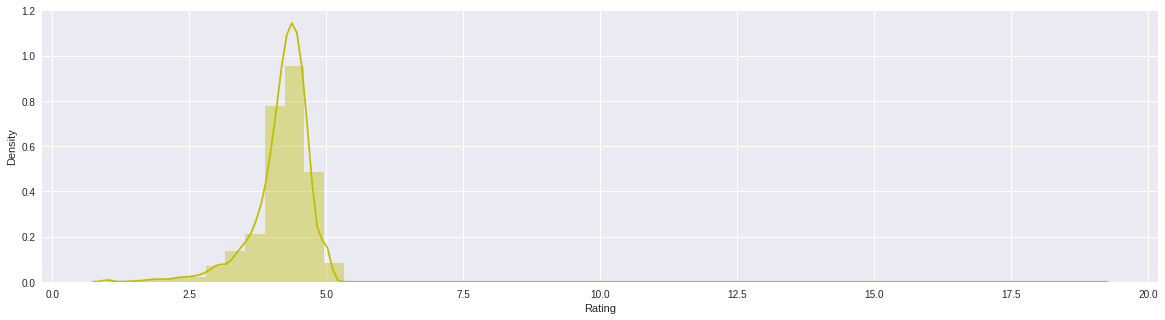

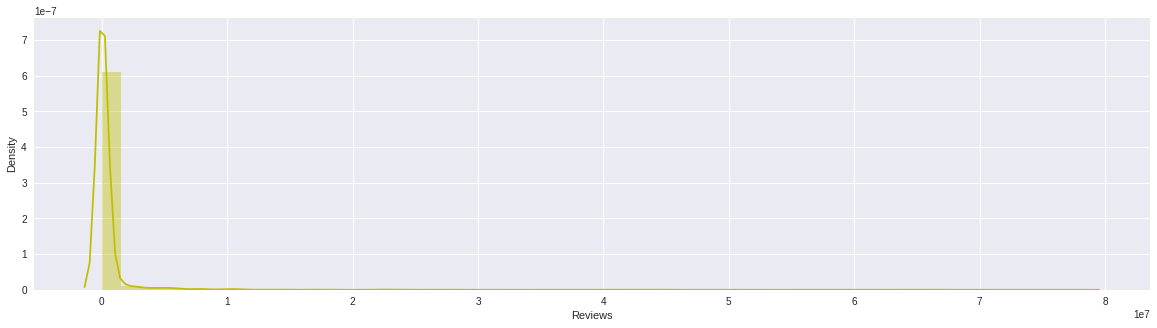

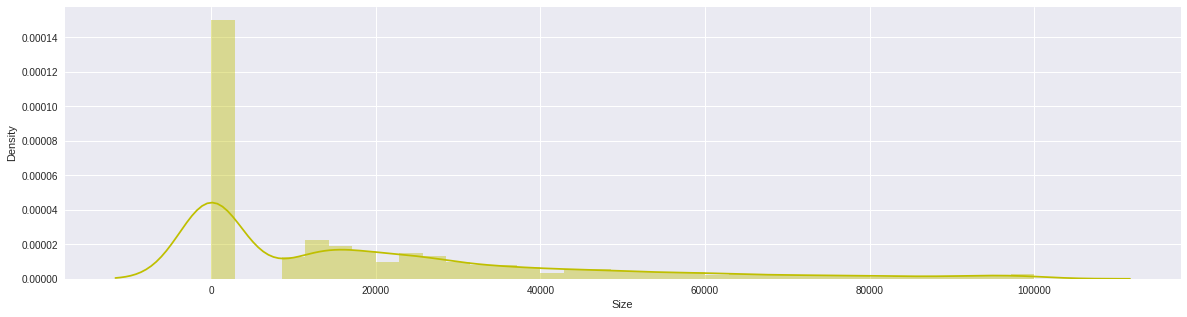

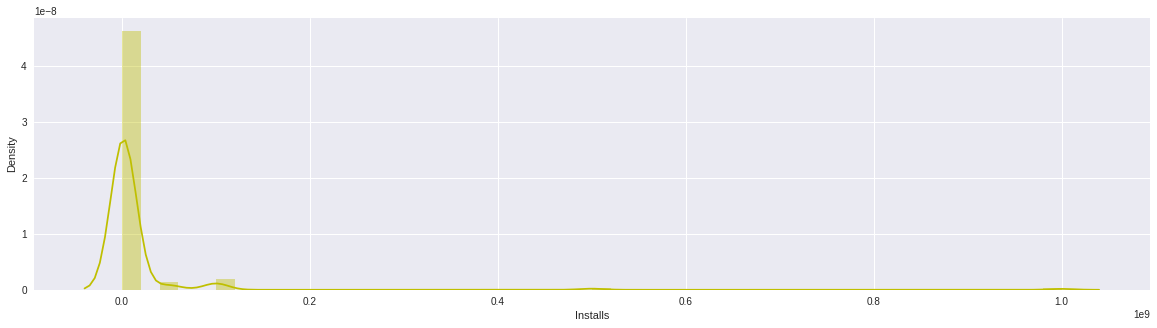

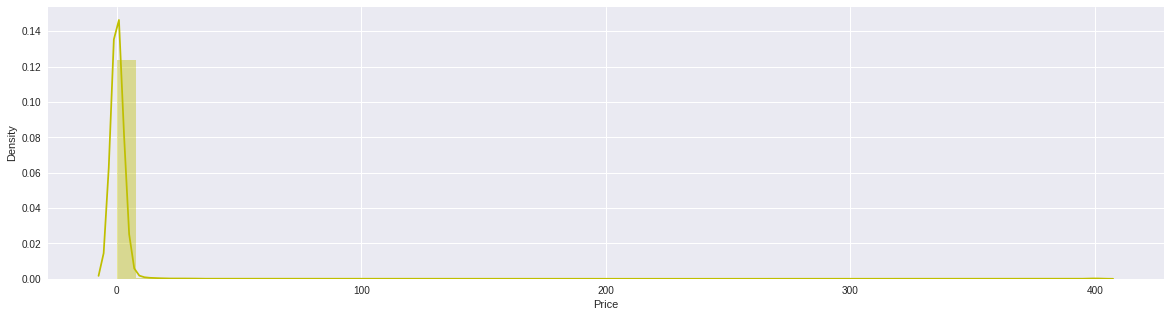

In [522]:
# data distribution in our features
for i in df_apps_cleaned.describe().columns:
  plt.figure(figsize=(20,5))
  sns.distplot(df_apps_cleaned[i],color="y")

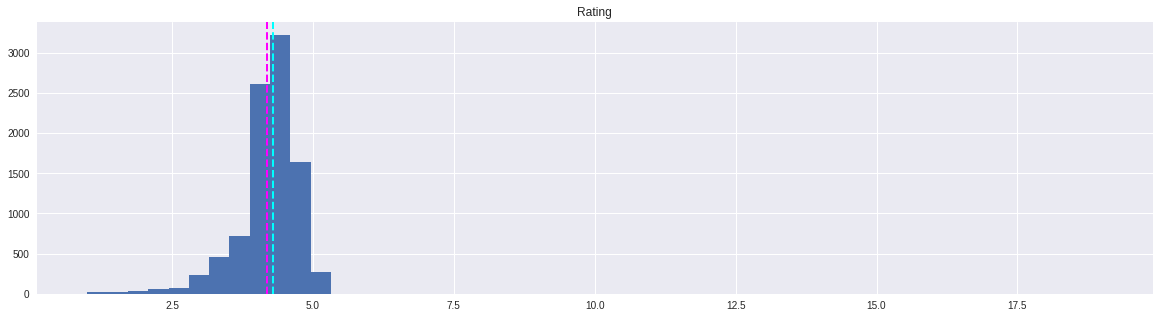

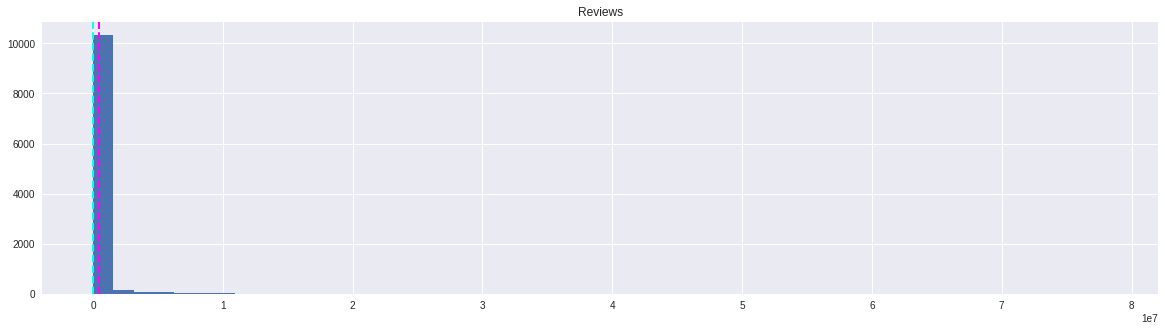

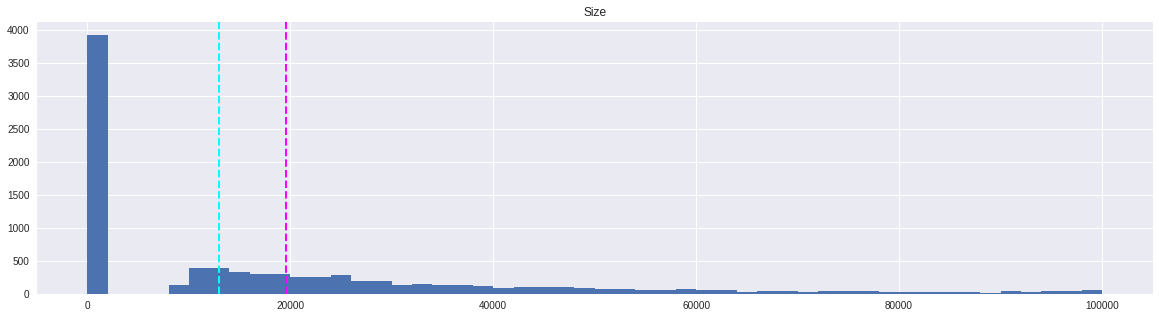

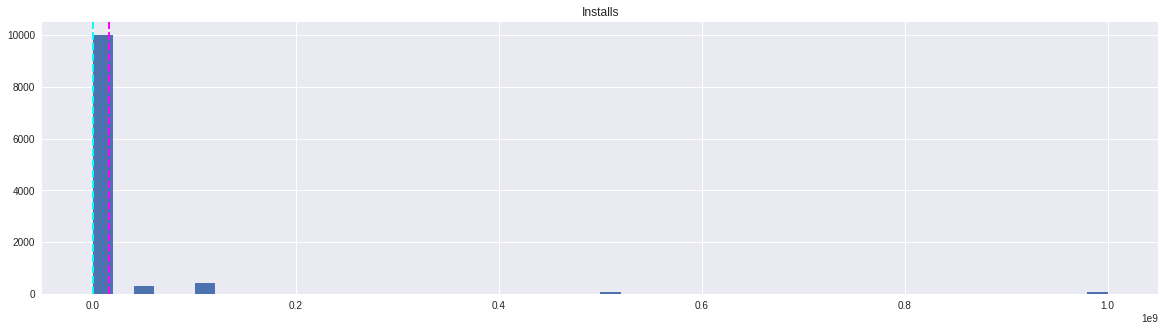

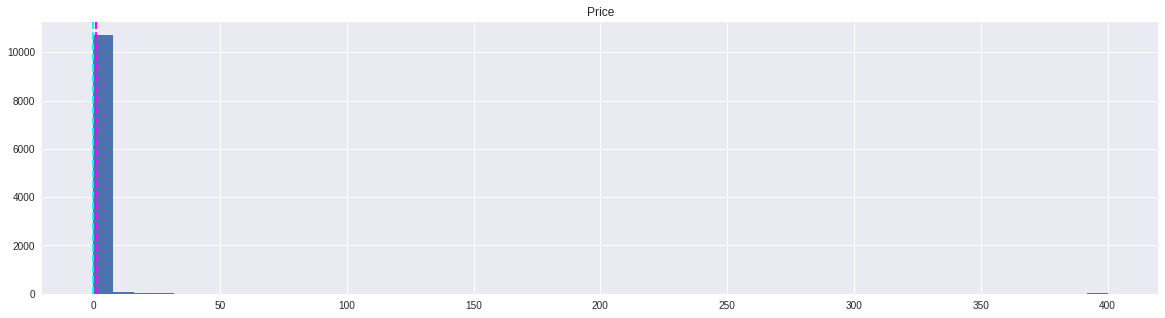

In [523]:
# skewness, mean and median of the numeric features of the dataset
for col in df_apps_cleaned.describe().columns:
    fig = plt.figure(figsize=(20, 5))
    ax = fig.gca()
    feature = df_apps_cleaned[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

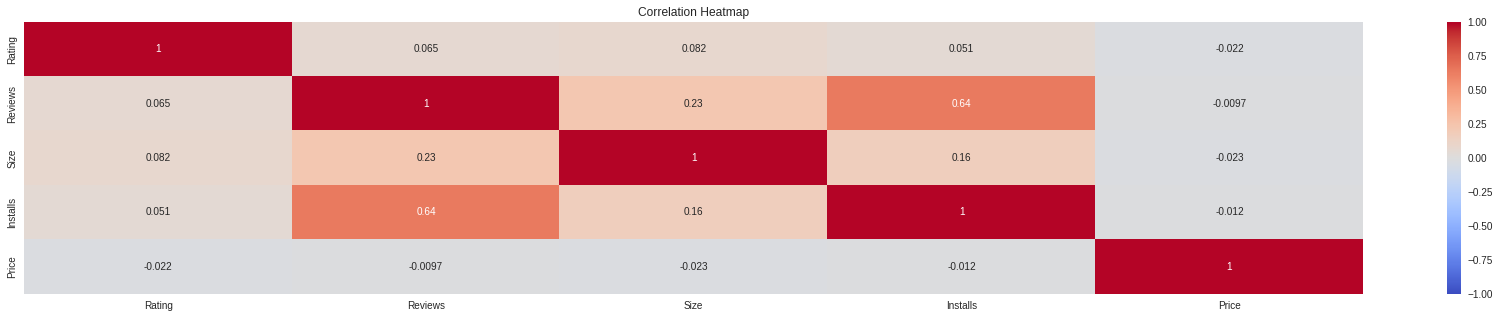

In [566]:
# correlation between the features in our dataset
sns.heatmap(df_apps_cleaned.corr(),vmin=-1,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## <b> Exploratory Data Analysis

### <b> Analysis of Categories

In [525]:
# unique list of categories
df_apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [526]:
# filter out the odd ones
df_apps = df_apps.loc[df_apps["Category"] != '1.9']

In [527]:
# percentage distribution of categories
df_apps['Category'].value_counts()*100/df_apps['Category'].value_counts().sum()

FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZATION         3.616236
COMMUNICATION           3.570111
SPORTS                  3.542435
LIFESTYLE               3.523985
FINANCE                 3.376384
HEALTH_AND_FITNESS      3.145756
PHOTOGRAPHY             3.090406
SOCIAL                  2.721402
NEWS_AND_MAGAZINES      2.610701
SHOPPING                2.398524
TRAVEL_AND_LOCAL        2.380074
DATING                  2.158672
BOOKS_AND_REFERENCE     2.130996
VIDEO_PLAYERS           1.614391
EDUCATION               1.439114
ENTERTAINMENT           1.374539
MAPS_AND_NAVIGATION     1.263838
FOOD_AND_DRINK          1.171587
HOUSE_AND_HOME          0.811808
LIBRARIES_AND_DEMO      0.784133
AUTO_AND_VEHICLES       0.784133
WEATHER                 0.756458
ART_AND_DESIGN          0.599631
EVENTS                  0.590406
COMICS    

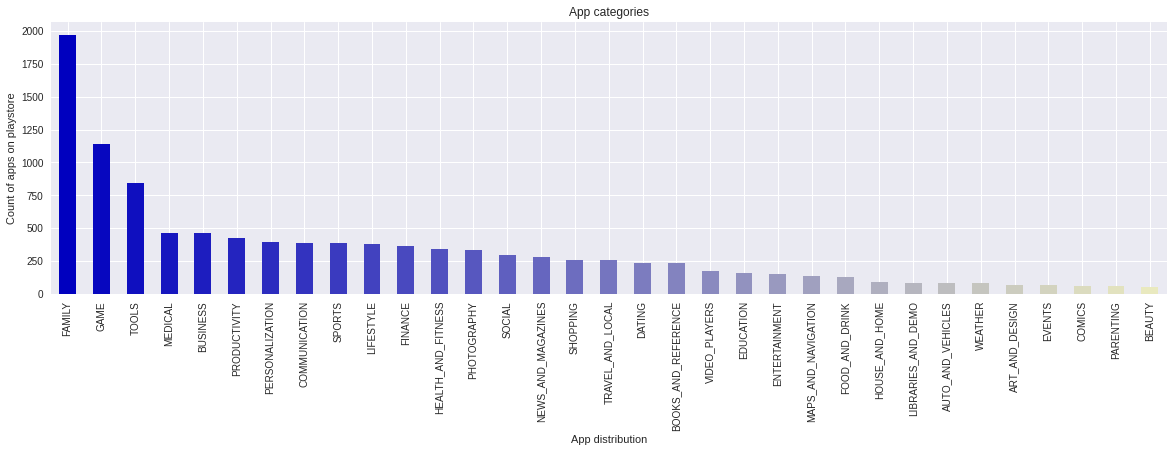

In [528]:
# visualize distribution of categories
my_colors = ['g', 'b']*5
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5 
my_colors = [(x/35.0, x/35.0, 0.75) for x in range(35)]
plt.rcParams['figure.figsize'] = (20,5)
df_apps['Category'].value_counts().plot(kind='bar',color=my_colors)
plt.title('App categories')
plt.xlabel('App distribution')
plt.ylabel('Count of apps on playstore')
plt.show()

#### **Inferences from the above plot:**
*  The category Family has the most number of apps.
*  The second category after family is games with most number of apps followed by tools, medical, business and so on.
*  The least number of apps are in categories beauty comics and parenting.

### <b> Downloads by App Categories <b>

In [529]:
# dataframe stacked by categories with installs
installs_df_apps = df_apps.groupby('Category')['Installs'].value_counts().unstack()
installs_df_apps

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,"100,000+","100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,NaN,1.0,NaN,3.0,4.0,NaN,NaN,11.0,5.0,1.0,19.0,NaN,NaN,5.0,3.0,NaN,6.0,1.0,NaN,6.0,NaN
AUTO_AND_VEHICLES,NaN,NaN,1.0,8.0,13.0,NaN,5.0,6.0,2.0,6.0,23.0,NaN,2.0,2.0,3.0,1.0,5.0,NaN,3.0,5.0,NaN
BEAUTY,NaN,NaN,NaN,1.0,8.0,NaN,NaN,13.0,1.0,5.0,8.0,NaN,NaN,3.0,1.0,1.0,5.0,NaN,1.0,6.0,NaN
BOOKS_AND_REFERENCE,NaN,NaN,1.0,34.0,20.0,1.0,19.0,25.0,24.0,7.0,20.0,6.0,7.0,16.0,10.0,3.0,12.0,NaN,9.0,17.0,NaN
BUSINESS,NaN,1.0,5.0,49.0,46.0,NaN,42.0,46.0,18.0,76.0,37.0,3.0,18.0,17.0,23.0,25.0,12.0,7.0,23.0,12.0,NaN
COMICS,NaN,NaN,NaN,1.0,12.0,NaN,NaN,11.0,2.0,1.0,11.0,NaN,NaN,5.0,4.0,1.0,7.0,NaN,NaN,5.0,NaN
COMMUNICATION,NaN,NaN,1.0,22.0,45.0,19.0,19.0,25.0,57.0,33.0,19.0,39.0,2.0,19.0,25.0,5.0,10.0,10.0,11.0,9.0,17.0
DATING,NaN,NaN,2.0,17.0,32.0,NaN,10.0,27.0,17.0,19.0,37.0,NaN,1.0,13.0,9.0,6.0,5.0,NaN,13.0,26.0,NaN
EDUCATION,NaN,NaN,NaN,2.0,52.0,NaN,NaN,5.0,30.0,NaN,21.0,4.0,NaN,NaN,22.0,NaN,6.0,NaN,NaN,14.0,NaN


Text(0, 0.5, 'Number of downloads in that category')

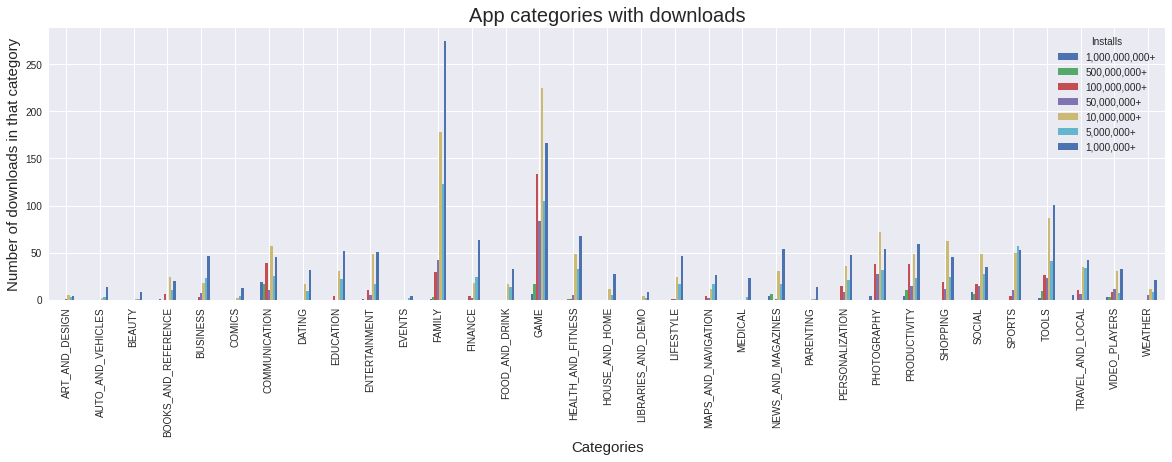

In [530]:
# visualize the dataframe stacked by categories with installs
installs_df_apps[['1,000,000,000+','500,000,000+','100,000,000+','50,000,000+','10,000,000+','5,000,000+','1,000,000+']].plot(kind='bar')
plt.rcParams['figure.figsize'] = (30,5)
plt.title('App categories with downloads',fontsize=20)
plt.xlabel('Categories',fontsize=15)
plt.ylabel('Number of downloads in that category',fontsize=15)

#### From the plot we can infer "family" and "game" type of apps dominate the playstore in terms of number of apps, so lets deep dive into it and find out what kind of apps they are by exploring their genres.

### <b> Family Category Analysis

In [531]:
# format the data
df_apps['Genres'].replace('Educational;Education','Education',inplace=True)
df_apps['Genres'].replace('Educational','Education',inplace=True)
df_apps['Genres'].replace('Education;Education','Education',inplace=True)
df_apps['Genres'].replace('Casual;Pretend Play','Casual',inplace=True)

In [532]:
# dataframe subset of family category
df_apps_family = df_apps[(df_apps['Category']=='FAMILY')]
df_apps_family_genre = df_apps_family['Genres'].value_counts()

# sort the top genres
df_apps_family_genre_top = df_apps_family_genre[df_apps_family['Genres'].value_counts()>20]
print(f'There are {df_apps_family_genre.sum()} apps in the family category')

There are 1972 apps in the family category


Text(0.5, 0, 'Genres')

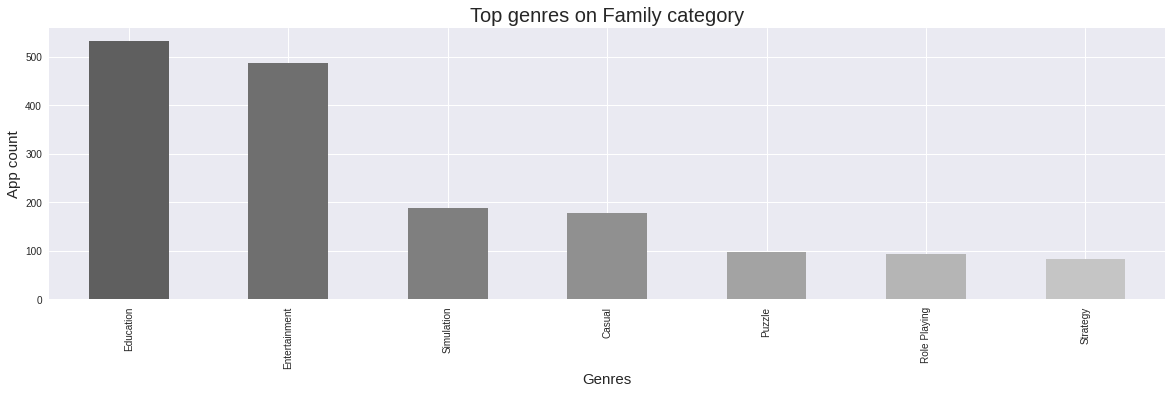

In [533]:
# plot the sorted genres
plt.rcParams['figure.figsize'] = (20,5)
cmap = plt.get_cmap('Greys')
colours = [cmap(i) for i in list(np.linspace(0.7,0.1,11))]
df_apps_family_genre_top.plot(kind='bar',color=colours)
plt.title('Top genres on Family category',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Genres',fontsize=15)

### <b> Game Category Analysis

In [534]:
# format the data
df_apps['Genres'].replace('Adventure;Action & Adventure','Combinations',inplace=True)
df_apps['Genres'].replace('Action;Action & Adventure','Combinations',inplace=True)
df_apps['Genres'].replace('Casual;Brain Games','Combinations',inplace=True)
df_apps['Genres'].replace('Casual;Creativity','Combinations',inplace=True)

df_apps['Genres'].replace('Casual;Pretend Play','Combinations',inplace=True)
df_apps['Genres'].replace('Simulation;Education','Combinations',inplace=True)
df_apps['Genres'].replace('Simulation;Action & Adventure','Combinations',inplace=True)
df_apps['Genres'].replace('Casual;Action & Adventure','Combinations',inplace=True)

In [535]:
# dataframe subset of game category
df_apps_game = df_apps[df_apps['Category']=='GAME']
df_apps_game_genre = df_apps_game['Genres'].value_counts()

# sort the top genres
df_apps_game_genre_top = df_apps_game_genre[df_apps_game['Genres'].value_counts()>20]
print(f'There are {df_apps_game_genre.sum()} apps in the game category')

There are 1144 apps in the game category


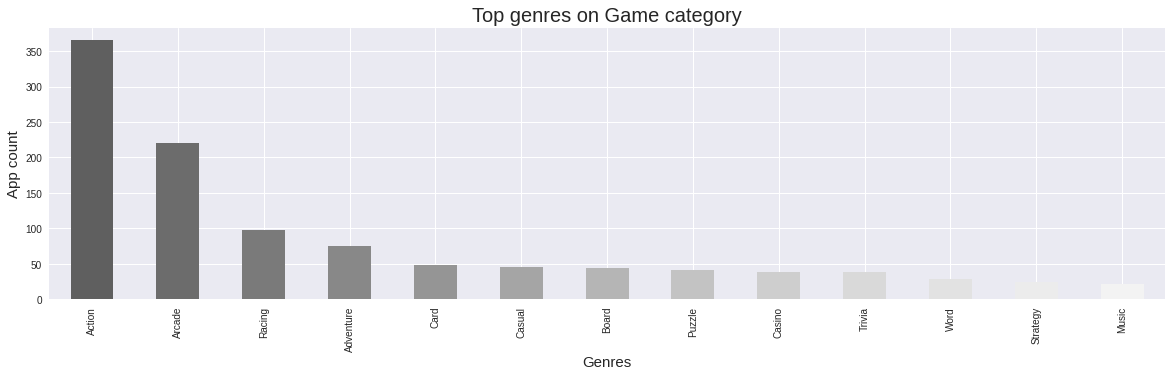

In [536]:
# plot the sorted genres
plt.rcParams['figure.figsize'] = (20,5)
colours = [cmap(i) for i in list(np.linspace(0.7,0.1,13))]
df_apps_game_genre_top.plot(kind='bar',color=colours)
plt.title('Top genres on Game category',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Genres',fontsize=15)
plt.show()

### <b> Billion+ downloads

In [537]:
# list of apps with billion+ downloads
df_apps_1B = df_apps[df_apps['Installs']=='1,000,000,000+']
_1B = df_apps_1B['App'].unique()
_1B

array(['Google Play Books', 'Messenger – Text and Video Chat for Free',
       'WhatsApp Messenger', 'Google Chrome: Fast & Secure', 'Gmail',
       'Hangouts', 'Skype - free IM & video calls', 'Google Play Games',
       'Subway Surfers', 'Facebook', 'Instagram', 'Google+',
       'Google Photos', 'Maps - Navigate & Explore', 'Google Street View',
       'Google', 'Google Drive', 'YouTube', 'Google Play Movies & TV',
       'Google News'], dtype=object)

In [538]:
# dataframe subset with billion+ downloads
df_apps_1Billion = df_apps[df_apps['App'].isin(_1B)]
df_apps_1Billion.drop(['Reviews','Last Updated'],axis=1,inplace=True)
df_apps_1Billion = df_apps_1Billion.drop_duplicates()
df_apps_1Billion['Installs'].replace('1,000,000,000+','1B+',inplace=True)

In [539]:
# apps with 1B+ installs
df_apps_1Billion = df_apps_1Billion[['App','Category','Installs']].reset_index()
df_apps_1Billion.drop('index',axis=1,inplace=True)
df_apps_1Billion.set_index('App')

,Category,Installs
App,,
Google Play Books,BOOKS_AND_REFERENCE,1B+
Messenger – Text and Video Chat for Free,COMMUNICATION,1B+
WhatsApp Messenger,COMMUNICATION,1B+
Google Chrome: Fast & Secure,COMMUNICATION,1B+
Gmail,COMMUNICATION,1B+
Hangouts,COMMUNICATION,1B+
Skype - free IM & video calls,COMMUNICATION,1B+
Google Play Games,ENTERTAINMENT,1B+
Subway Surfers,GAME,1B+


Text(0.5, 0, 'Categories')

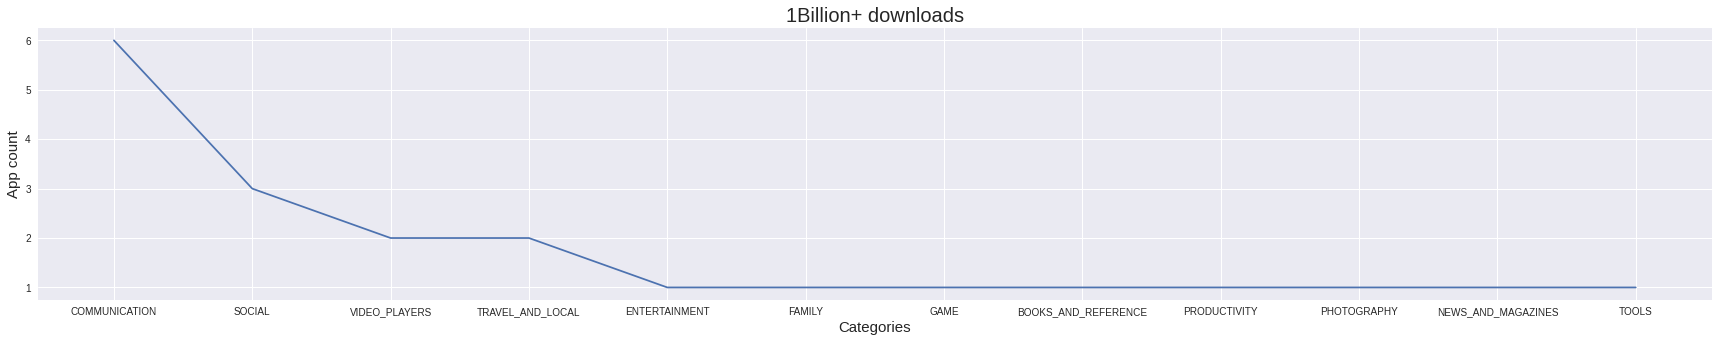

In [540]:
# plot app categories with 1B+ installs
plt.rcParams['figure.figsize'] = (30,5)
sns.lineplot(data=df_apps_1Billion['Category'].value_counts())
plt.title('1Billion+ downloads',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Categories',fontsize=15)

#### Though family and gaming apps dominate the playstore, apps under communication catergory is more popular.

### **Top rated apps**

In [541]:
# format the installs data
df_apps_r = df_apps
df_apps_r['Installs'] = df_apps['Installs'].str.replace(',','')
df_apps_r['Installs'] = df_apps['Installs'].str.replace('+','')
df_apps_r['Installs'] = df_apps['Installs'].replace('Free',np.nan)
df_apps_r['Installs'] = df_apps['Installs'].astype(float)

In [542]:
# subset the top rated apps
df_apps_r = df_apps_r[(df_apps['Installs']>100000000)]
df_apps_r = df_apps_r[df_apps_r['Rating']>4.5]

In [543]:
# top rated apps with 100 million plus downloads
df_apps_r = df_apps_r[['App','Category','Rating','Installs']].reset_index()
df_apps_r = df_apps_r.drop('index', axis = 1)
df_apps_r['Installs'] = df_apps_r['Installs'].astype(str)
df_apps_r['Installs'].replace('500000000.0','100M+',inplace=True)
df_apps_r.set_index('App')

,Category,Rating,Installs
App,,,
Google Duo - High Quality Video Calls,COMMUNICATION,4.6,100M+
SHAREit - Transfer & Share,TOOLS,4.6,100M+
Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,100M+
Google Duo - High Quality Video Calls,COMMUNICATION,4.6,100M+
SHAREit - Transfer & Share,TOOLS,4.6,100M+
"Security Master - Antivirus, VPN, AppLock, Booster",TOOLS,4.7,100M+


### **Most Reviewed Apps**

In [544]:
# format the review data
df_apps['Reviews'] = df_apps['Reviews'].str.replace('M','000000')
df_apps['Reviews'] = df_apps['Reviews'].astype(float)

In [545]:
# sort by descending order
df_apps_review = df_apps['Reviews'].sort_values(ascending=False)[0:15].reset_index()

In [546]:
# subset by apps with most reviews
df_apps_review = df_apps.loc[df_apps_review['index']]

In [547]:
# drop duplicates
df_apps_reviews_unique = df_apps_review.drop('Reviews',axis=1)
df_apps_reviews_unique = df_apps_reviews_unique.drop_duplicates().reset_index()

In [548]:
# most reviewed apps
df_apps_review.loc[df_apps_reviews_unique['index']].set_index('App')

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Facebook,SOCIAL,4.1,78158306.0,Varies with device,1.000000e+09,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
Instagram,SOCIAL,4.5,66577446.0,Varies with device,1.000000e+09,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
Clash of Clans,GAME,4.6,44893888.0,98M,1.000000e+08,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


### <b> Price Analysis

In [549]:
# format the price data
df_apps['Price'] = df_apps.Price.replace('Everyone',np.nan)
df_apps['Price'] = df_apps.Price.str.replace('$','').astype(float)

In [550]:
# subset the data by price
df_apps_20 = df_apps[(df_apps['Price']>1)]
df_apps_20 = df_apps[(df_apps['Price']<=20)]
df_apps_20plus = df_apps[(df_apps['Price']>20)]

# apps with price less than $20
df_apps_price_20 = df_apps_20['Price']
# apps with price greater than $20
df_apps_price_20plus = df_apps_20plus['Price']

In [551]:
print(f'There are {len(df_apps_price_20)} apps in price range $1 to $20' )
print(f'There are {len(df_apps_price_20plus)} apps above the price of $20')

There are 10793 apps in price range $1 to $20
There are 47 apps above the price of $20


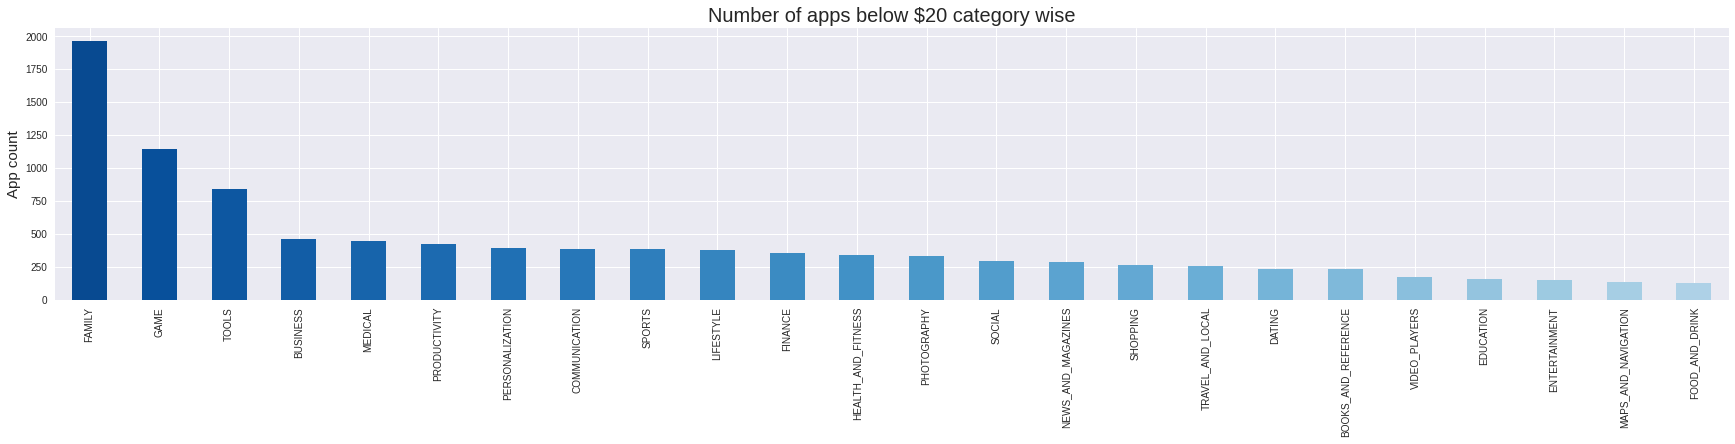

In [552]:
# plot apps with price less than $20 category wise
df_apps_20 = df_apps_20['Category'].value_counts()
cmap = plt.get_cmap('Blues')
colours = [cmap(i) for i in list(np.linspace(0.9,0.1,33))]
df_apps_20[df_apps['Category'].value_counts()>100].plot(kind='bar',color=colours)
plt.rcParams['figure.figsize'] = (30,5)
plt.title('Number of apps below $20 category wise',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.show()

In [553]:
# apps with price greater than $20 and 10k+ installs
df_apps_20plus = df_apps_20plus[df_apps_20plus['Installs']>10000]
df_apps_20plus = df_apps_20plus[['App','Category','Price','Installs']]
df_apps_20plus = df_apps_20plus.sort_values(by='Price',ascending=False)
df_apps_20plus.drop_duplicates().set_index('App')

,Category,Price,Installs
App,,,
I am rich,LIFESTYLE,399.99,100000.0
I Am Rich Premium,FINANCE,399.99,50000.0
Golfshot Plus: Golf GPS,SPORTS,29.99,50000.0
Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,24.99,100000.0


### <b> Content Rating

In [554]:
# app content by age
df_apps_content = df_apps['Content Rating'].value_counts()

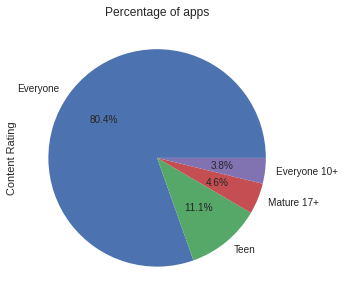

In [555]:
# plot the percentage of app contents
df_apps_content = df_apps['Content Rating'].value_counts()
df_apps_c = df_apps_content[df_apps['Content Rating'].value_counts()>100]
plt.title('Percentage of apps')
df_apps_c.plot.pie(autopct="%.1f%%")
plt.show()

### <b> Last updated

In [556]:
# filter out the odd one
df_apps.drop(df_apps[df_apps['Last Updated']=='1.0.19'].index,inplace=True)

In [557]:
# format string to datetime object
df_apps['Update Date'] = df_apps['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))

In [558]:
# sort by recent update
df_apps.sort_values('Update Date',ascending=False,inplace=True)
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update Date
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392.0,Varies with device,1000000.0,Free,0.00,Everyone,Shopping,"August 8, 2018",Varies with device,Varies with device,2018-08-08
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434.0,3.6M,50000.0,Free,0.00,Everyone,Tools,"August 8, 2018",1.1.9,4.0.3 and up,2018-08-08
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27M,50000000.0,Free,0.00,Teen,Action,"August 8, 2018",1.1.2,4.1 and up,2018-08-08
10718,BankNordik,FINANCE,3.9,28.0,15M,5000.0,Free,0.00,Everyone,Finance,"August 8, 2018",7.3.2,5.0 and up,2018-08-08
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4M,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,2018-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,Freecell CY,GAME,4.0,387.0,1.1M,50000.0,Free,0.00,Everyone,Card,"April 16, 2011",1.3.3,1.6 and up,2011-04-16
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767.0,4.1M,5000000.0,Free,0.00,Everyone 10+,Action,"April 11, 2011",1.4.3,2.0 and up,2011-04-11
10282,FD Shift Calendar Widget,TOOLS,4.1,981.0,73k,100000.0,Free,0.00,Everyone,Tools,"March 16, 2011",1.2.4,1.6 and up,2011-03-16
7430,CJ Poker Odds Calculator,GAME,4.1,207.0,116k,50000.0,Free,0.00,Everyone,Card,"January 30, 2011",1.2,1.6 and up,2011-01-30


In [559]:
# function to return app updates and total downloads of the year
def appcount_downloads(ad, i):
  app = len(df_apps[df_apps['Update Date'].dt.year==i]['App'].unique())
  download = df_apps[df_apps['Update Date'].dt.year==i]['Installs'].sum()
  ad.append((i,app,download))
  print(f'For the year {i} app count:{app} downloads:{download}')  
  return ad

In [560]:
# app updates and total downloads of the years
ad = []
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
for i in years:
  appcount_downloads(ad, i)

For the year 2010 app count:1 downloads:100000.0
For the year 2011 app count:15 downloads:17407100.0
For the year 2012 app count:26 downloads:13992210.0
For the year 2013 app count:108 downloads:103191365.0
For the year 2014 app count:203 downloads:269956226.0
For the year 2015 app count:451 downloads:424541475.0
For the year 2016 app count:779 downloads:1401495793.0
For the year 2017 app count:1796 downloads:4071454839.0
For the year 2018 app count:6287 downloads:161331294479.0


In [561]:
# create dataframe with year, app updates and total download of the year
df_update = pd.DataFrame(ad,columns=['year','Updated app','downloads'])
df_update['Updated app'] = df_update['Updated app'].apply(lambda x: x*100/df_update['Updated app'].sum())
df_update['downloads'] = df_update['downloads'].apply(lambda x: x*100/df_update['downloads'].sum())

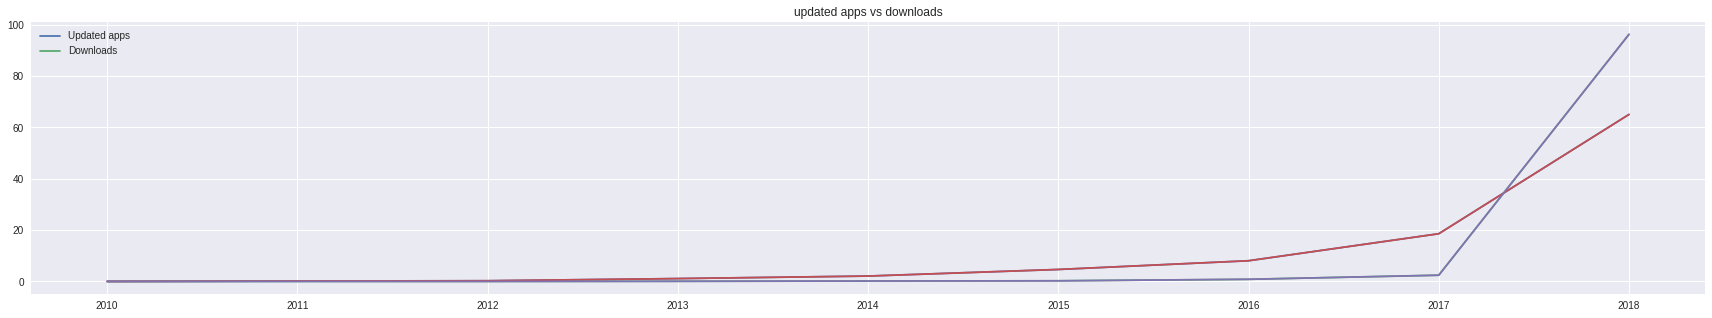

In [562]:
# visualize the dataframe
x = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
y = df_update[['Updated app','downloads']]
lines = plt.plot(x, y)
plt.legend(lines[:2], ['Updated apps', 'Downloads'])
plt.title('updated apps vs downloads')
plt.plot(x,y)
plt.show()

### <b> App Reviews Analysis

In [563]:
# merge both datasets by App
df = pd.merge(df_apps,df_reviews,how='inner',on='App')

In [564]:
# sample of the merged dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update Date,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,Why like exist playstore?! Does Google even re...,Negative,-0.500,0.400000
1,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,We loved game especially little brother . Thumbs,Negative,-0.025,0.733333
2,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,£104 unlock content?! Bloody trap!!! Absolutel...,Negative,-1.000,0.950000
3,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,NaN,NaN,NaN,NaN
4,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,Too many ads. Kids lose interest second add,Positive,0.250,0.250000


In [565]:
# drop NaN values
df = df.dropna(axis=0)